# HW5

AUTHORS: **Harshit Shiroiya** (hshiroiy@iu.edu) and **Mahadevan Iyer** ()

In [92]:
import sys
import os
import re
import math
import time
import matplotlib.pyplot as plt
import random

## Problem 1: Pattern-matching: The brute-force

### Problem 1.1: The brute-force pattern-matching algorithm
Describe a text D and a pattern P such that the brute-force pattern-matching algorithm runs in
Ω(dp) time.The lengths of D and P are d and p, respectively.

### Solution:

In [93]:
# Brute force
def brute_force(T,P):
    n = len(T)
    m = len(P)
    k=0
    count=0
    for i in range(n-m+1):
        k=0
        while(k<m and T[i+k]==P[k]):
            k+=1
        if(k==m):
            count+=1
    return count
        
a = 'cdcdcdcdc'
b = 'cdc'
brute_force(a,b)

4

### Problem 1.2: Python’s str class and pattern-matching
In this part, you are asked to modify three pattern matching programs given to you (See ap-
pendix). Run your modified programs for varying-length patterns and show your results.
The count method in Python’s str class takes a text D and a pattern P and returns the
maximum number of non-overlapping occurrences of a P within D. As an example ‘cdcdcd-
cdc’.count(‘cdc’) returns 2.
1. Modify the brute-force pattern-matching to return non-overlapping occurrences of a P
within D.
2. Similar to the previous question (Problem 1.2.1), do the same on the Boyer-Moore pro-
gram.
3. Similar to problem 1.2.1, modify the KMP program.

### Solution:

In [94]:
# Brute force
def brute_force(T,P):
    n = len(T)
    m = len(P)
    k=0
    count=0
    for i in range(n-m+1):
        k=0
        while(k<m and T[i+k]==P[k]):
            k+=1
        if(k==m):
            count+=1
    return count
        
a = 'cdcdcdcdc'
b = 'cdc'
brute_force(a,b)

4

In [95]:
# Boyer - Moore
def boyer_moore(T,P):
    n = len(T)
    m = len(P)
    count=0
    if(m==0):
        return 0
    last = {}
    for k in range(m):
        last[P[k]]=k
    i = m-1
    k = m-1
    while(i<n):
        if(T[i]==P[k]):
            if(k==0):
                count+=1
                j = last.get(T[i],-1)
                i+=m-min(k,j+1)
                k=m-1
            else:
                i-=1
                k-=1
        else:
            j = last.get(T[i],-1)
            i+=m-min(k,j+1)
            k=m-1
    return count

T = 'cdcdcdcdc'
P = 'cdc'
boyer_moore(T,P)

4

In [96]:
# Normal KMP Algorithm returning number of matched patterns

def compute_kmp_fail(P):
    m = len(P)
    fail = [0] * m
    j = 1
    k = 0
    while j < m:
        if P[j] == P[k]:
            fail[j] = k+1
            j += 1
            k += 1
        elif k > 0:
            k = fail[k-1]
        else:
            j += 1
    return fail

def find_kmp(T, P):
    n, m = len(T), len(P)
    if m == 0:
        return 0
    fail = compute_kmp_fail(P)
    j = 0
    k = 0
    cnt=0
    while j < n:
        if T[j] == P[k]:
            if k == m-1:
                cnt+=1
                k = fail[k-1]
            j += 1
            k += 1
        elif k > 0:
            k = fail[k-1]
        else:
            j += 1
    return cnt

T = 'cdcdcdcdc'
P = 'cdc'

# T = 'AAABBCCDDEEAAAAAA'
# P = 'AA'

find_kmp(T,P)

4

## Problem 2: Experimental Analysis of Pattern-Matching Algorithms

Perform an experimental analysis of pattern matching algorithms in terms of:
1. Number of character comparison: Perform an experimental analysis of the efficiency of
the brute-force, the KMP and Boyer-Moore pattern matching algorithms for varying-length
patterns.
2. Relative speed comparison: Perform an experimental comparison of the brute-force, KMP,
and Boyer-Moore pattern-matching algorithms. Run each algorithm against large text doc-
uments using varying-length patterns and report the relative running times.


### Solution:

## Problem 3: Matrix-chain Multiplication

The matrix-chain multiplication problem: Given a chain of < D1, D2, . . . , Dn > of n matrices fully
parenthesize the product < D1 ·D2 ···Dn > in a way so that the number of scalar multiplications
is minimized. Each Di has a pi−1 × pi dimension and i = 1, 2, . . . , n.
1. The Brute-Force: [10 pt.]: Implement a Python program to solve the matrix-chain multipli-
cation problem by the brute force algorithm.
2. Bottom-up Dynamic Programming [20 pt.]: Implement a Python program to solve the
matrix-chain multiplication problem using bottom-up dynamic programming approach.
3. Dynamic Programming with Memoization [Extra Credit, 10 pt.]: Implement a Python pro-
gram to solve the matrix-chain multiplication problem using dynamic programming with
memoization.

In [97]:
# 1. Brute Force
def Matrix_chain_brute(A,i,j):
    if i == j:
        return 0
    temp = sys.maxsize
    for k in range(i, j):
        count = (Matrix_chain_brute(A, i, k) + Matrix_chain_brute(A, k + 1, j)+ A[i-1] * A[k] * A[j])
        if count < temp:
            temp = count
    return temp


A = [25,15,20,30,45,5,10]
n = len(A) - 1
print("Matrix Chain Multiplication using Brute Force: ",Matrix_chain_brute(A,1,n))


Matrix Chain Multiplication using Brute Force:  14375


In [107]:
# 2. Bottom Up Dynamic Programming
def parenthesis(A,i,j):
    if i==j:
        print("A{0}".format(i), end= "") 
    else :
        print("(", end= "")
        parenthesis(A,i,A[i][j])
        parenthesis(A,A[i][j] +1 ,j)
        print(")", end= "")
        
def Matrix_chain_Dynamic(A,n):
    array  = [[0 for x in range(n)] for x in range(n)]
    array_s  = [[0 for x in range(n)] for x in range(n)]
    for i in range(1, n):
        array[i][i] = 0
    
    for L in range(2, n):
        for i in range(1, n-L + 1):
            j = i + L-1
            array[i][j] = sys.maxsize
            for k in range(i, j):          
                q = array[i][k] + array[k + 1][j] + A[i-1]*A[k]*A[j]
                if q < array[i][j]:
                    array_s[i][j] = k
                    array[i][j] = q
    
    
    return array[1][n-1]


A = [25,15,20,30,45,5,10]
n = len(A) 
# parenthesis(array_s,0,n-1)
# print("\n Optimal Number of Multiplication is :", array_s[0],[n - 1])
print("\n Matrix Chain Multiplication using Dynamic Programming: ",Matrix_chain_Dynamic(A,n))



 Matrix Chain Multiplication using Dynamic Programming:  14375


In [115]:
# 3. Memoization

A = [[-1 for i in range(100)] for j in range(100)]
 

def Matrix_chain_Memoised(p, i, j):
    if(i == j):
        return 0
     
    if(A[i][j] != -1):
        return A[i][j]
     
    A[i][j] = sys.maxsize
     
    for k in range(i,j):
        A[i][j] = min(A[i][j], Matrix_chain_Memoised(p, i, k) + Matrix_chain_Memoised(p, k + 1, j)+ p[i - 1] * p[k] * p[j])
#         print(A[i][j])
    return A[i][j]
 
def Matrix_chain(p):
    i = 1
    j = n - 1   
    return Matrix_chain_Memoised(p, i, j)


Y = [25,15,20,30,45,5,10]
# n = len(Y)
print("Minimum number of multiplications is",Matrix_chain(Y))


Minimum number of multiplications is 14375


Matrix Chain Multipliaction Using Brute Force takes 0.000086s to run for size 5
Matrix Chain Multipliaction Using Dynamic Programming takes 0.000054s to run for size 5
Matrix Chain Multipliaction Using Memoization takes 0.000017s to run for size 5

Matrix Chain Multipliaction Using Brute Force takes 0.000667s to run for size 7
Matrix Chain Multipliaction Using Dynamic Programming takes 0.000081s to run for size 7
Matrix Chain Multipliaction Using Memoization takes 0.000002s to run for size 7

Matrix Chain Multipliaction Using Brute Force takes 0.005072s to run for size 9
Matrix Chain Multipliaction Using Dynamic Programming takes 0.000124s to run for size 9
Matrix Chain Multipliaction Using Memoization takes 0.000004s to run for size 9

Matrix Chain Multipliaction Using Brute Force takes 0.028551s to run for size 11
Matrix Chain Multipliaction Using Dynamic Programming takes 0.000180s to run for size 11
Matrix Chain Multipliaction Using Memoization takes 0.000006s to run for size 11

M

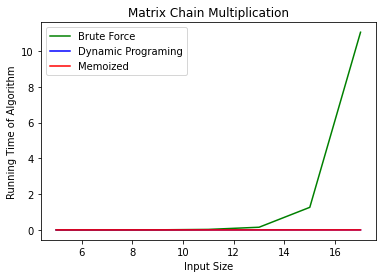

In [119]:
brute = []
dynamicP = []
memoized = []
size = 5
li = []

for i in range(1,8):
    res = random.sample(range(1, 100), size)
    li.append(len(res))
    
    start = time.time()
    Matrix_chain_brute(res,0, len(res) - 1)
    end = time.time()
    brute.append(end - start)
    print("Matrix Chain Multipliaction Using Brute Force takes {:f}s to run for size {:d}".format(end-start,len(res)))
    
    start = time.time()
    Matrix_chain_Dynamic(res,len(res))
    end = time.time()
    dynamicP.append(end-start)
    print("Matrix Chain Multipliaction Using Dynamic Programming takes {:f}s to run for size {:d}".format(end-start,len(res)))
    
    start = time.time()
    Matrix_chain(res)
    end = time.time()
    memoized.append(end - start)
    print("Matrix Chain Multipliaction Using Memoization takes {:f}s to run for size {:d}".format(end-start,len(res)))
    print()
    size += 2


plt.plot(li, time_brute, color = 'green', label = 'Brute Force')
plt.legend()

plt.plot(li, time_BottomUP, color = 'blue', label = 'Dynamic Programing')
plt.legend()

plt.plot(li, time_Memoized, color = 'red', label = 'Memoized')
plt.legend()

plt.xlabel('Input Size')
plt.ylabel('Running Time of Algorithm')
plt.title('Matrix Chain Multiplication')
plt.show()

## Problem 4: Longest Common Sub-sequence (LCS) Problem

Implement a Python program to solve LCS problem using dynamic programming. Run your
program to find the best sequence alignment between DNA strings. Show your results.
Longest Common Sub-sequence (LCS) problem: Given two character strings over some
alphabet, find a longest string that is a sub-sequence of given two strings.
Data source: https://www.ncbi.nlm.nih.gov/genbank/

### Solution:

In [121]:
def lcs(s1,s2):
    x = len(s1)
    y = len(s2)
#     print (x)
#     print (y)
    array_lcs = [[0 for col in range(y+1)] for row in range(x+1)]

    for i in range(x+1):
        for j in range(y+1):
            if i ==0 or j ==0:
                array_lcs[i][j]= 0
            elif s1[i-1]==s2[j-1]:
                array_lcs[i][j] = 1 + array_lcs[i-1][j-1]
            else:
                array_lcs[i][j] = max(array_lcs[i][j-1],array_lcs[i-1][j])
    
    subseq = []

    for i in range(1,x+1):
        for j in range(1,y+1):
            
            if array_lcs[i][j] == (array_lcs[i-1][j-1] + 1) and array_lcs[i][j]> 0 and array_lcs[i][j] != array_lcs[i-1][j] and array_lcs[i][j] != array_lcs[i][j-1] :
                
                subseq.append(s1[i-1])
                
    #     print(''.join(subseq))
   

    return array_lcs[x][y]
    
    



# source : https://ftp.ncbi.nlm.nih.gov/genbank/  
# gbbct1.seq file
seq1 = 'ppppgatcctccatatacaacggtatctccacctcaggtttagatctcaacaacggaaccattg'
seq2 = 'qqppccgacatgagacagttaggtatcgtcgagagttacaagctaaaacgagcagtagtcagct'


print(lcs(seq1,seq2))

41
